# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), it includes the following 21 columns (which all self explanatory): 
>
>**['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']**
>
>- Certain columns, like ‘cast’, ‘genres’, ‘director’ and ‘production_companies’, contain multiple values separated by pipe (|) characters.
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Questions for Analysis
>**How Many Movies ...?**
> - Q01.............. Produced Every Year?
> - Q02.............. For Each Genre?
> - Q03.............. For Each Runtime Bin?
> - Q04.............. For Each Budget Bin (Very-Low, Low, Average, High, Very-High)?
> - Q05.............. Considered as (Super-Flop, Flop, Hit, Super-Hit)?

>**The Profitable Movies (Hit & Super-Hit Movies):** 
> - Q06. How Has The Film Industry Evolved From Year To Year In Relation To Budget, Revenue And Gross Profit?
> - Q07. What Was The Most Successful Genres, Cast, director ....?

In [1]:
%%capture
# Using %%capture cell magic command to hide the Upgrade process
# Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> We will use pandas module to load our dataset from csv file, explore its shape, dtypes, missing values and any other general properties that could help us wrangle our data

In [3]:
# Load And Explore Data
tmdb_df = pd.read_csv('Database_TMDb_movie_data//tmdb-movies.csv')
print(tmdb_df.shape)
tmdb_df.head(3)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Checking for columns names, dtypes and missing data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>It seems that all columns has the correct dtype and suitable column name
>- The dtype of `release_date` column is object not datetime, but we will drop it and use the `release_year` instead
>
>There's some missing values in some columns, it appears it's less in the columns we are going to use, let's check it in a different way
<a id='null_counts'></a>

In [5]:
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
tmdb_df[tmdb_df.runtime == 0].runtime.count()

31

In [8]:
tmdb_df[tmdb_df.budget == 0].budget.count()

5696

In [9]:
tmdb_df[tmdb_df.revenue == 0].revenue.count()

6016

In [10]:
tmdb_df[(tmdb_df.revenue == 0) | (tmdb_df.budget == 0)].revenue.count()

7011

In [11]:
tmdb_df.runtime[tmdb_df.runtime>300].count()

22

>- The descriptive statistics shwon above tell us that around **65%** of the movies in our dataset have **0 dollar** for its budget and/or revenue, it's clearly missing data and we need to deal with it before doing any profitability analysis.
>- Some movies have **0 minute** for its runtime, it's clearly missing data.
>- Ther's 22 Movies with runtime greater than **300 minutes**, with a max of **900 minutes** runtime which is actual runtime for the movie **`The Story of Film: An Odyssey`**, not a typo.

In [12]:
# checking columns contains '|'
pipe_cols = tmdb_df.apply(lambda x: x.str.contains('|', regex=False), axis=1).any()
pipe_cols[pipe_cols]

cast                    True
director                True
tagline                 True
keywords                True
overview                True
genres                  True
production_companies    True
dtype: bool

> `cast`, `director` and `genres` are the only columns we are going to deal with that contain multiple values separated by pipe (|) characters

In [13]:
# Checking For Duplicated Rows
tmdb_df.duplicated().sum()

1

> Only 1 duplicate row. However we should deal with it.


### Data Cleaning
> After exploring our dataset, we found that:
- There's some data (columns) will not be used during our analysis
- There's 1 duplicated row
- Some columns contain multiple values separated by pipe (|) characters
- 31 Movies With 0 runtime
- 22 Movies with runtime greater than 300 minutes
- Around 65% of the movies in our dataset have 0 dollar for its budget and/or revenue

In [14]:
# Remove unused columns
drop_col=['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'tagline', 'keywords',
          'overview','production_companies', 'release_date', 'vote_count', 'vote_average']
tmdb_df.drop(columns = drop_col, inplace=True)
tmdb_df.shape

(10866, 8)

In [15]:
# Remove duplicate row
tmdb_df.drop_duplicates(inplace=True)
tmdb_df.shape

(10865, 8)

> In our dataset there's 22 Movies with runtime greater than 300 minutes, during this analysis we will treat them as outliers and drop them.

In [16]:
tmdb_df.drop(tmdb_df[tmdb_df.runtime>300].index, inplace=True)
tmdb_df.shape

(10843, 8)

>- Ther's very few missing data related to the first 3 questions, so we will be using our full dataset.
- However, for any profitability analysis we need to remove all records with 0 dollar budget and/or revenue
- We also will create `'profit_adj'`, `'budget_level'` and `'success_level'` columns for our analysis

In [17]:
# We are going to replace 0 values in columns ['runtime', 'budget_adj','revenue_adj'] with np.nan
tmdb_df.iloc[:,np.r_[3,6,7]] = tmdb_df.iloc[:,np.r_[3,6,7]].replace(0, np.NAN)

# let's create new column for the gross profit
tmdb_df['profit_adj'] = tmdb_df['revenue_adj'] - tmdb_df['budget_adj']

#### Assumptions
> - It seems there's no right or wrong answer about budgets and success levels, it all depends on perspective.
- For the purpose of this analysis we will assume the following budget levels
    - Very-Low <= 1 Million, Low <= 25 Million, Average <= 50 Million, High <= 100 Million, Very-High > 100 Million
- `if a film released in theatres fails to break even by a large amount, it is considered flop` - wikipedia
- For the purpose of this analysis we will assume the following success levels
    - Super-Flop <= -50 Million, Flop < 0 dollars, Hit <= 100 Million, Super-Hit > 100 Million

In [18]:
# Creates budget_level column
bin_edges = [0,1000000,25000000,50000000,100000000,500000000]
bin_names = ['Very-Low', 'Low', 'Average', 'High', 'Very-High']
tmdb_df['budget_level'] = pd.cut(tmdb_df['budget_adj'], bin_edges, labels=bin_names)

In [19]:
# Creates success_level column
bin_edges = [-500000000,-50000000,-0.01,100000000,3000000000]
bin_names = ['Super-Flop', 'Flop', 'Hit', 'Super-Hit']
tmdb_df['success_level'] = pd.cut(tmdb_df['profit_adj'], bin_edges, labels=bin_names)

In [20]:
# We Will Create 2nd dataframe with all the movies with values in 'budget_adj','revenue_adj' columns
tmdb_profit_df = tmdb_df.dropna(subset = ['budget_adj','revenue_adj'])
print(f'Movies On Orignial Dataset: {tmdb_df.shape[0]}')
print(f'Movies On Profitability Analysis Dataset: {tmdb_profit_df.shape[0]}')

Movies On Orignial Dataset: 10843
Movies On Profitability Analysis Dataset: 3853


> - Wow, that's huge drop, clearly Film industry are very secretive about their finances

>To avoid unnecessary expanding to our dataset we will handle columns contain multiple values separated by pipe (|) characters and get the necessary analysis during Exploratory Data Analysis process

<a id='eda'></a>
## Exploratory Data Analysis

### Functions

In [21]:
def group_count(data, sep=None, show=True):
    """
    If delimiter (sep) provided, Splits every string value in Series (data) by (sep),
    and then transform each element to a row.
    Finally return an ordered series with counts of unique values, with option to print max and min info.
    """
    if (sep != None):
        data = data.str.split(sep)
        data = data.explode()
    data = data.value_counts()
    if (show):
        print(f'Maximum: {data.idxmax()} - Movies Count: {data.max()}')
        print(f'Minimum: {data.idxmin()} - Movies Count: {data.min()}')
    return data

In [22]:
def show_plot(data, xcol, ycol, data2=None, kind='bar', figsize=(16, 6), colors=['C0','g','r'],
              title='', subtitle='Vs', note='', notes=['',''], ylabel='', **kwargs):
    """
    Shows different kinds of plots with many optional parameters to control the output graph.
    parameters:
    data: dataframe or series
    xcol: name of the column to use for the plot and/or X axis label
    ycol: list of other columns names to plot with the xcol if data is dataframe and/or Y axis label if data series
    data2= to use instead of ycol, list of series to plot with the data if series (useful with different dataframes)
    kind, figsize, colors: Known parameters for the plot 
        (kind works only if data is series, this function limited to line and scatter for dataframe)
    title: plot title
    subtitle, note, notes: if title not provided these optional parameters can help build title using axises labels
    ylabel: another way to provide Y axis label if ycol is a list
    **kwargs: Options to pass to matplotlib plotting method
    """
    plt.figure(figsize=figsize)
    if isinstance(data, pd.DataFrame):
        if(isinstance(ycol,list)):
            for col in ycol:
                plt.plot(xcol, col,data=data ,linewidth=4, label=col.replace('_',' ').title(), alpha=.7, **kwargs)
            if(title == ''): title = " ".join([", ".join(ycol).replace('_',' '),subtitle,xcol.replace('_',' '),'\n',note])
            ycol = ylabel
        else:
            plt.scatter(xcol, ycol,data=data ,linewidth=4, label=xcol, alpha=.7, **kwargs)
    else:
        data.plot(kind=kind ,linewidth=4, label=ycol+' '+notes[0], alpha=.7, color=colors[0], **kwargs);
        if isinstance(data2, list):
            for x in range(len(data2)):
                data2[x].plot(kind=kind ,linewidth=4, label=ycol+' '+notes[x+1], alpha=.7, **kwargs, color=colors[x+1]);
        
    plt.xlabel(xcol.replace('_',' ').title())
    plt.ylabel(ycol.replace('_',' ').title())
    if(title == ''): title = " ".join([ycol.replace('_',' '),subtitle,xcol.replace('_',' '),'\n',note])
    plt.title(title.title())
    plt.legend(fontsize=14)
    plt.show();

In [23]:
def most_least(data, name, sep=None):
    """
    get the top and buttom 3 value counts in a series using the group_count function
    """
    most_3 = group_count(data=data,sep=sep, show=False)[:3]
    most_3.name = name
    least_3 = group_count(data=data,sep=sep, show=False)[-3:]
    least_3.name = name
    return most_3.to_frame() , least_3.to_frame()

In [24]:
from IPython.display import display_html 
def display_3_in_row(data1,data2,data3):
    """
    display 3 dataframes in the same row,
    Using display_html function from IPython library and pandas.DataFrame.style property
    """
    pd_styler1 = data1.style.set_table_attributes('style="display:inline; margin-right:100px;"')
    pd_styler2 = data2.style.set_table_attributes('style="display:inline; margin-right:100px;"')
    pd_styler3 = data3.style.set_table_attributes('style="display:inline;"')
    display_html(pd_styler1._repr_html_() + pd_styler2._repr_html_() + pd_styler3._repr_html_() , raw=True)

### How Many Movies ...?
- Q01.............. Produced Every Year?
- Q02.............. For Each Genre?
- Q03.............. For Each Runtime Bin?
- Q04.............. For Each Budget Bin (Very-Low, Low, Average, High, Very-High)?
- Q05.............. Considered as (Super-Flop, Flop, Hit, Super-Hit)?

### Q01. How Many Movies Produced Every Year?

In [25]:
tmdb_df.release_year.describe().astype(int).to_frame()[3:].T

,min,25%,50%,75%,max
release_year,1960,1995,2006,2011,2015


Maximum: 2014 - Movies Count: 700
Minimum: 1969 - Movies Count: 31


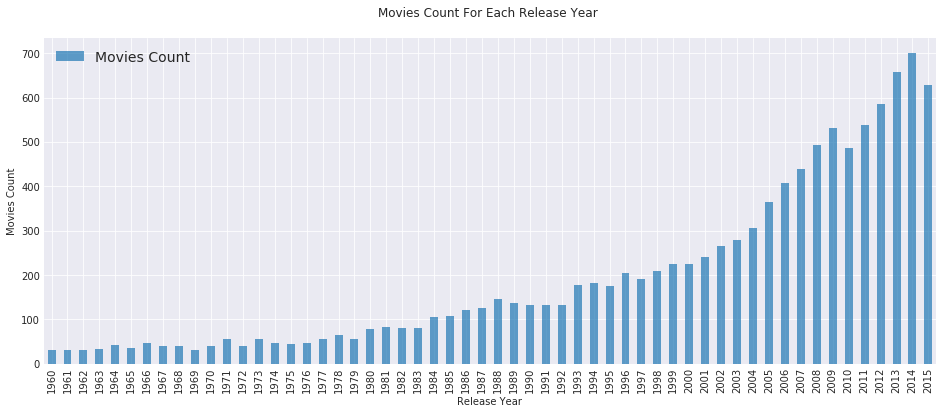

In [26]:
show_plot(group_count(data=tmdb_df.release_year).sort_index(),'release_year','Movies Count',subtitle='For Each')

> From the graph and calculations we can see that:
- 75% of the movies in our dataset released between 1995 and 2015
- 50% of the movies in our dataset released between 2006 and 2015
- Year 2014 has the largest number of released movies in our dataset
- Year 1961 has the smallest number of released movies in our dataset
>
> It's clearly that movies production increased almost every year

### Q02. How Many Movies For Each Genre?

In [27]:
genres = group_count(data=tmdb_df.genres,sep='|')
genres

Maximum: Drama - Movies Count: 4747
Minimum: Western - Movies Count: 163


Drama              4747
Comedy             3792
Thriller           2906
Action             2382
Romance            1710
Horror             1636
Adventure          1467
Crime              1353
Family             1230
Science Fiction    1228
Fantasy             913
Mystery             809
Animation           699
Documentary         512
Music               408
History             326
War                 267
Foreign             188
TV Movie            167
Western             163
Name: genres, dtype: int64

In [28]:
top = tmdb_df.genres.str.contains("|".join(genres.index[:5])).sum()/tmdb_df.genres.count()
print(f"The top 5 genres ({', '.join(genres.index[:5])}) appeard as genres for {top:5.2%} of the movies in our dataset")

The top 5 genres (Drama, Comedy, Thriller, Action, Romance) appeard as genres for 86.89% of the movies in our dataset


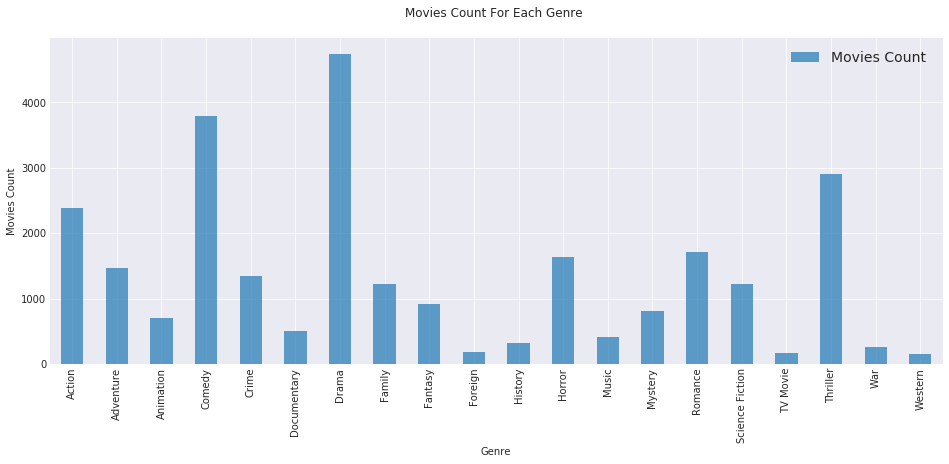

In [29]:
show_plot(genres.sort_index(),'genre','Movies Count',subtitle='For Each')

> From the graph and calculations we can see that:
- Drama genre has the largest number of released movies in our dataset
- Western genre has the smallest number of released movies in our dataset
- The top 5 genres (Drama, Comedy, Thriller, Action, Romance) appeard as genres for 86.89% of the movies in our dataset

### Q03. How Many Movies For Each Runtime Bin

In [30]:
tmdb_df.runtime.describe().astype(int).to_frame().T

,count,mean,std,min,25%,50%,75%,max
runtime,10812,101,24,2,90,99,111,300


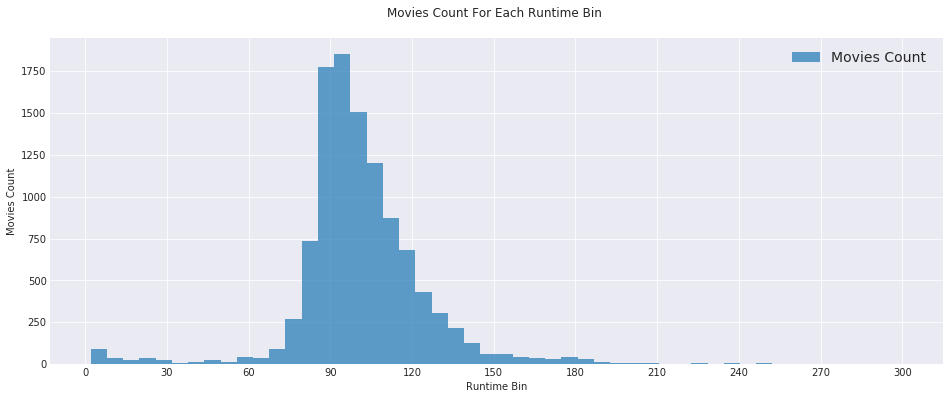

In [31]:
show_plot(tmdb_df.runtime,'Runtime Bin','Movies Count',kind='hist', bins=50, xticks=np.arange(0,301,30), subtitle='For Each')

In [32]:
tmdb_df.query('80 <= runtime <= 120').runtime.count()/tmdb_df.runtime.count()

0.7895856455789864

> From the graph and calculations we can see that:
- 50% of the movies in our dataset have runtime between 90 and 111 minutes
- Around 79% of the movies in our dataset have runtime between 80 and 120 minutes

### Q04. How Many Movies For Each Budget Bin (Very-Low, Low, Average, High, Very-High)?

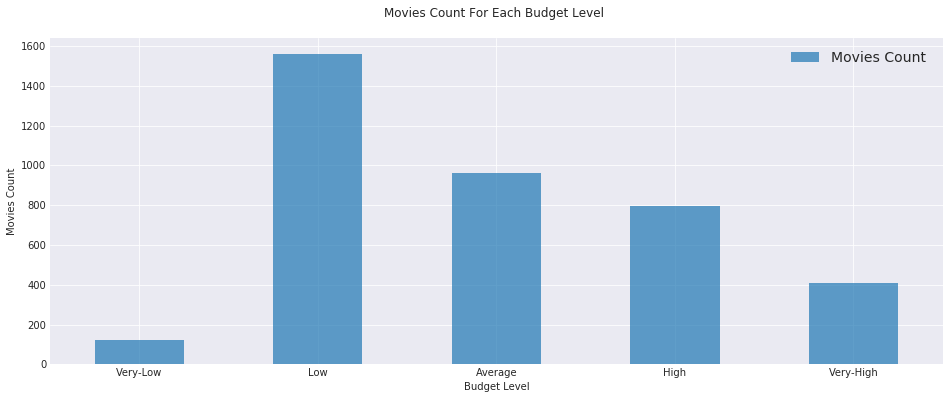

In [33]:
show_plot(tmdb_profit_df.budget_level.value_counts().sort_index(),'budget_level','Movies Count', rot=0, subtitle='For Each')

### Q05. How Many Movies Considered as (Super-Flop, Flop, Hit, Super-Hit)?

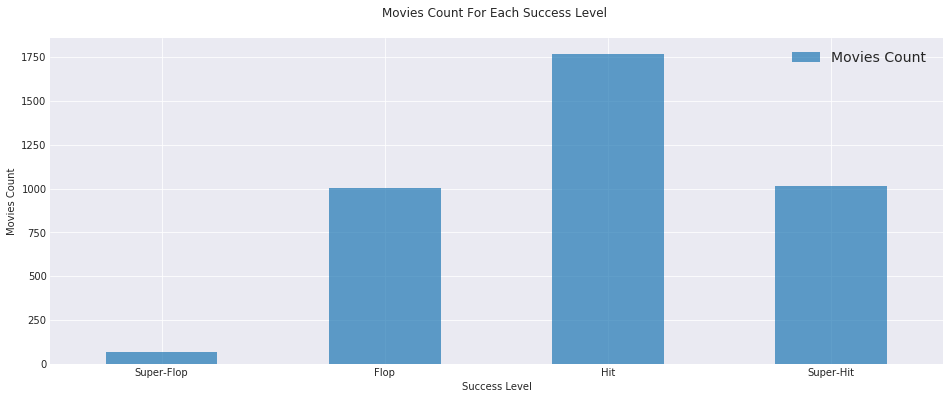

In [34]:
show_plot(tmdb_profit_df.success_level.value_counts().sort_index(),'success_level','Movies Count', rot=0, subtitle='For Each')

> Taking in consideration our assumptions for budget and success levels
- It appears that there's a negative correlation between number of released movies and budget levels in our dataset
- Most of the movies in our dataset considered as hit and super-hit.

### The Profitable Movies (Hit & Super-Hit Movies)

- Q06. How Has The Film Industry Evolved From Year To Year In Relation To Budget, Revenue And Gross Profit
- Q07. What Was The Most Successful Genres, Cast, director ....?

> For this part of our analysis we will filter our dataset to include only the profitable movies (Hit & Super-Hit Movies)

In [35]:
# Hit Movies Dataset
tmdb_hit_df = tmdb_profit_df.query('profit_adj >= 0')
tmdb_hit_df.shape

(2782, 11)

### Q06. How Has The Film Industry Evolved From Year To Year In Relation To Budget, Revenue And Gross Profit?
> To answer this question, we will compare Budget, Revenue And Gross Profit across the years in both datasets (Profitability Analysis Dataset And Hit Movies Dataset)
> - We will also use our original dataset to look to some other features

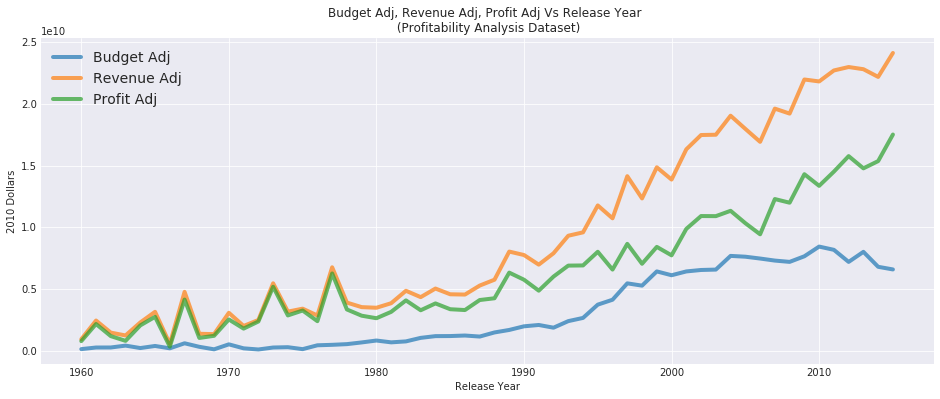

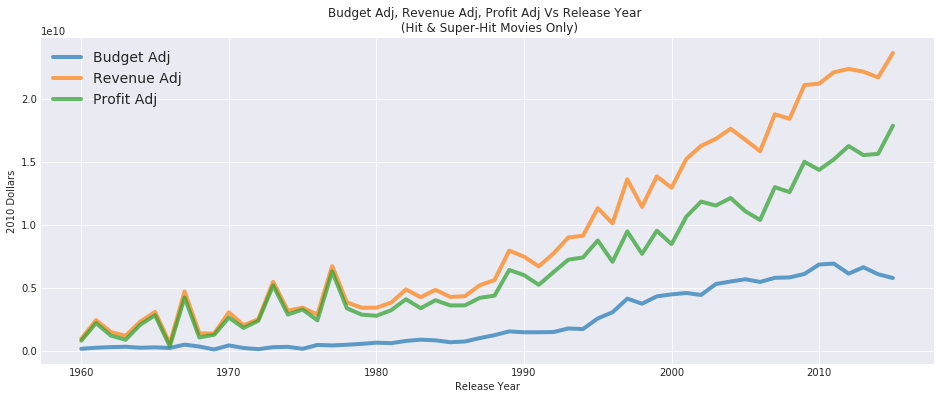

In [36]:
# line plot for the 'budget_adj','revenue_adj','profit_adj' columns for both datasets 
# (Profitability Analysis Dataset And Hit Movies Dataset)
show_plot(tmdb_profit_df.groupby('release_year',as_index=False).sum(),'release_year', 
          ['budget_adj','revenue_adj','profit_adj'], note='(Profitability Analysis Dataset)', ylabel='2010 dollars')
show_plot(tmdb_hit_df.groupby('release_year',as_index=False).sum(),'release_year', 
          ['budget_adj','revenue_adj','profit_adj'], note='(Hit & Super-Hit Movies Only)', ylabel='2010 dollars')

> As we can see, except for some few drops, film industry spending and gaining more and more every year, especially after 1995, when budget and profit began to increase dramatically
>
> The 2 line charts are almost identical as most of the movies in our dataset considered as hit.

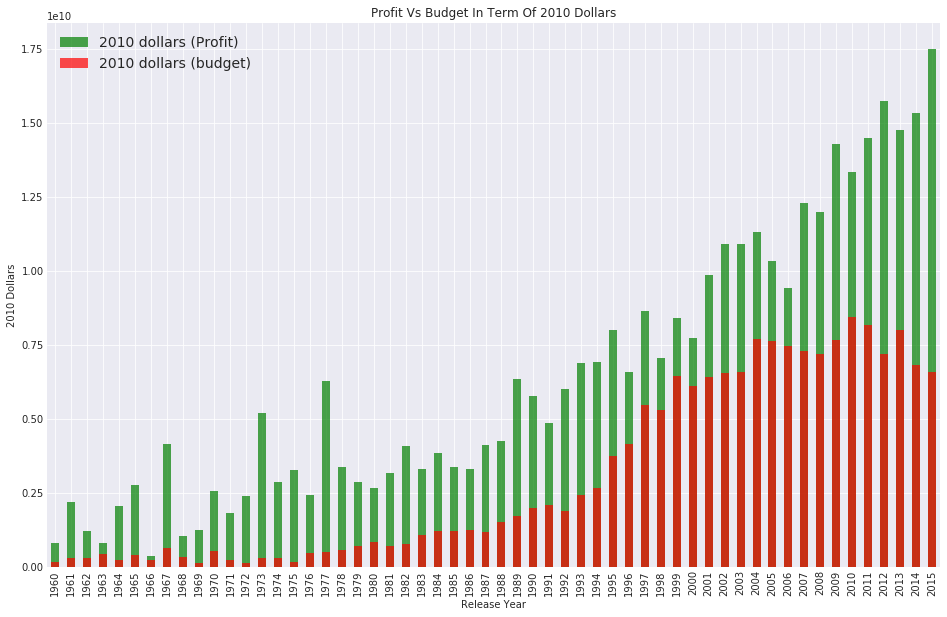

In [37]:
data2 = tmdb_profit_df.groupby('release_year').sum().profit_adj
data3 = tmdb_profit_df.groupby('release_year').sum().budget_adj
show_plot(data2,'release_year','2010 dollars', subtitle='For Each', figsize=(16, 10),
          notes=['(Profit)','(budget)'],data2=[data3], colors=['g','r'],
         title='Profit Vs budget in term of 2010 dollars')

>- Year 2015 is the 12th in the highest budget list, and the 1st in the profit list
- Year 2010 is the 1st in the highest budget list, and the 7th in the profit list
>
> These graphs and calculations are made in around 35% of the movies in our dataset, let' compare the total number of movies released every year in our 3 datasets '(All Movies)', '(Movies With Known Profit)', '(Hit & Super-Hit Movies)'

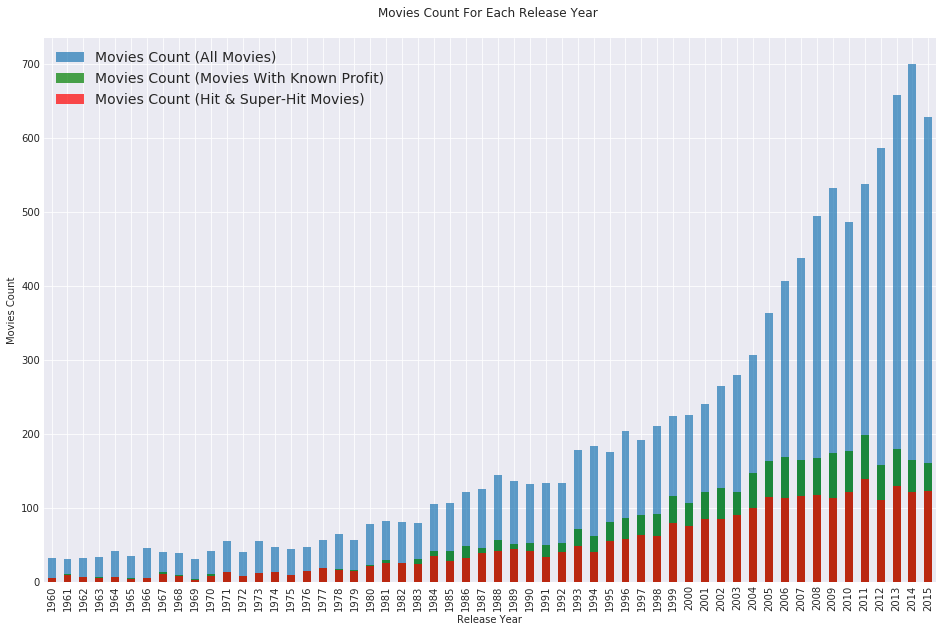

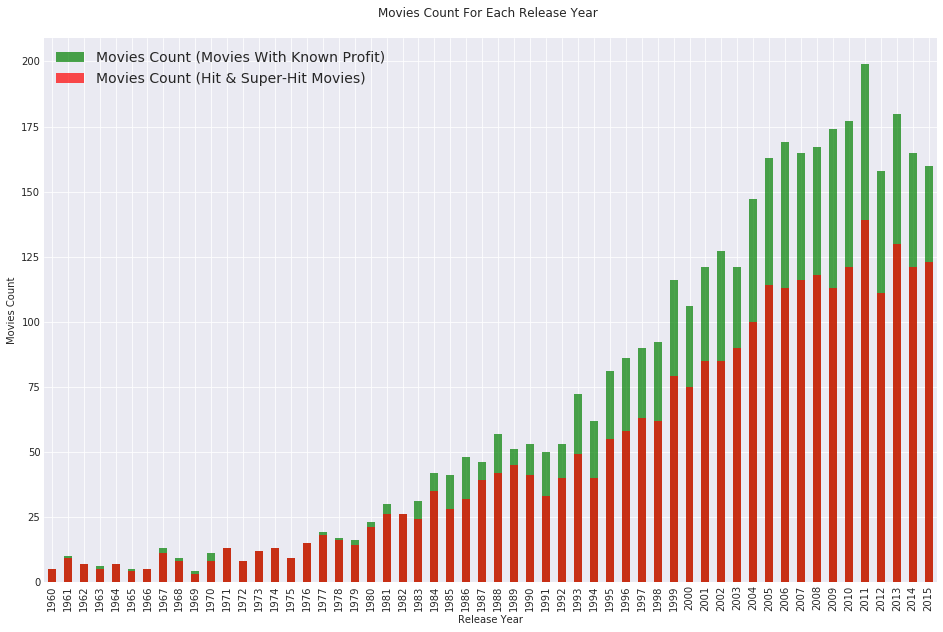

In [38]:
data1 = tmdb_df.release_year.value_counts().sort_index()
data2 = tmdb_profit_df.release_year.value_counts().sort_index()
data3 = tmdb_hit_df.release_year.value_counts().sort_index()
notes = ['(All Movies)','(Movies With Known Profit)','(Hit & Super-Hit Movies)']

# We will create 2 plots, 1st plot will show movies count for every year in our 3 dataset
show_plot(data1,'release_year','Movies Count', subtitle='For Each', figsize=(16, 10),
          notes=notes,data2=[data2,data3])

# 2nd plot will compare between movies count in '(Movies With Known Profit)', '(Hit & Super-Hit Movies)' datasets
show_plot(data2,'release_year','Movies Count', subtitle='For Each', figsize=(16, 10),
          notes=notes[1:],data2=[data3], colors=['g','r'])

> Let's check the average budget and runtime for the hit movies

In [39]:
tmdb_hit_df.runtime.mean()

110.18475916606758

In [40]:
tmdb_hit_df.budget_adj.mean()

47545157.28846981

> - Movies production increased almost every year in terms of budget, revenue and gross profit
> - We can see that even when there's a drop in gross profit or number of hit movies in one year, that's didn't discourage the productions companies from spending even more millions of dollars to produce more number of movies in the following year.
> - In respect to all the movies in our dataset, the average runtime for all the hit movies is 110 minutes and the average production budget is around 47.5 Million in terms of 2010 dollars.

### Q07. What Was The Most Successful Genres, Cast, director ....?
> We will check some 'most and least' statistics
- Top and Bottom 3 Years in term of released movies and hit movies
- Top and Bottom 3 Genres in term of released movies and hit movies
- Top and Bottom 3 actor/actress in term of released movies and hit movies
- Top and Bottom 3 directors in term of released movies and hit movies

In [41]:
print('Top and Bottom 3 Years in term of released movies and hit movies')
most_all,least_all = most_least(tmdb_df.release_year,'(All Movies)')
most_profit,least_profit = most_least(tmdb_profit_df.release_year,'(Movies With Known Profit)')
most_hit,least_hit = most_least(tmdb_hit_df.release_year,'(Hit & Super-Hit Movies)')
display_3_in_row(most_all,most_profit,most_hit)
print('-'*120)
display_3_in_row(least_all,least_profit,least_hit)

Top and Bottom 3 Years in term of released movies and hit movies


,(All Movies)
2014,700
2013,658
2015,629
,(Movies With Known Profit)
2011,199
2013,180
2010,177
,(Hit & Super-Hit Movies)
2011,139
2013,130


------------------------------------------------------------------------------------------------------------------------


,(All Movies)
1960,32
1969,31
1961,31
,(Movies With Known Profit)
1966,5
1960,5
1969,4
,(Hit & Super-Hit Movies)
1960,5
1965,4


> - Year 2014 in the top of the released movies list, however it's not in the top 3 hit movies list
> - Year 2011 in the top of the hit movies list, however it's not in the top 3 released movies list

In [42]:
print('Top and Bottom 3 Genres in term of released movies and hit movies')
most_all,least_all = most_least(tmdb_df.genres,'(All Movies)','|')
most_profit,least_profit = most_least(tmdb_profit_df.genres,'(Movies With Known Profit)','|')
most_hit,least_hit = most_least(tmdb_hit_df.genres,'(Hit & Super-Hit Movies)','|')
display_3_in_row(most_all,most_profit,most_hit)
print('-'*120)
display_3_in_row(least_all,least_profit,least_hit)

Top and Bottom 3 Genres in term of released movies and hit movies


,(All Movies)
Drama,4747
Comedy,3792
Thriller,2906
,(Movies With Known Profit)
Drama,1755
Comedy,1358
Thriller,1203
,(Hit & Super-Hit Movies)
Drama,1173
Comedy,1012


------------------------------------------------------------------------------------------------------------------------


,(All Movies)
Foreign,188
TV Movie,167
Western,163
,(Movies With Known Profit)
Documentary,35
Foreign,13
TV Movie,1
,(Hit & Super-Hit Movies)
Documentary,27
Foreign,4


> - Drama, Comedy and Thriller movies are the most released as well as most hit movies.
> - Foreign and TV Movie among the least released and least hit movies.

In [43]:
print('Top and Bottom 3 actor/actress in term of released movies and hit movies')
most_all,least_all = most_least(tmdb_df.cast,'(All Movies)','|')
most_profit,least_profit = most_least(tmdb_profit_df.cast,'(Movies With Known Profit)','|')
most_hit,least_hit = most_least(tmdb_hit_df.cast,'(Hit & Super-Hit Movies)','|')
display_3_in_row(most_all,most_profit,most_hit)
print('-'*120)
display_3_in_row(least_all,least_profit,least_hit)

Top and Bottom 3 actor/actress in term of released movies and hit movies


,(All Movies)
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
,(Movies With Known Profit)
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
,(Hit & Super-Hit Movies)
Robert De Niro,38
Bruce Willis,33


------------------------------------------------------------------------------------------------------------------------


,(All Movies)
Patrick Creery,1
Ali Al Ameri,1
Jean Louisa Kelly,1
,(Movies With Known Profit)
Sonu Sood,1
Irving Metzman,1
Judy Cornwell,1
,(Hit & Super-Hit Movies)
Danny Lloyd,1
Michael-Leon Wooley,1


>- Robert De Niro, Bruce Willis, Tom Hanks and Samuel L. Jackson our top superstars.
>- Many actors and actresses got cast in 1 movie only

In [44]:
print('Top and Bottom 3 directors in term of released movies and hit movies')
most_all,least_all = most_least(tmdb_df.director,'(All Movies)','|')
most_profit,least_profit = most_least(tmdb_profit_df.director,'(Movies With Known Profit)','|')
most_hit,least_hit = most_least(tmdb_hit_df.director,'(Hit & Super-Hit Movies)','|')
display_3_in_row(most_all,most_profit,most_hit)
print('-'*120)
display_3_in_row(least_all,least_profit,least_hit)

Top and Bottom 3 directors in term of released movies and hit movies


,(All Movies)
Woody Allen,46
Clint Eastwood,34
Martin Scorsese,31
,(Movies With Known Profit)
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
,(Hit & Super-Hit Movies)
Steven Spielberg,27
Clint Eastwood,21


------------------------------------------------------------------------------------------------------------------------


,(All Movies)
James Gartner,1
Maksim Korostyshevsky,1
Tom Kalin,1
,(Movies With Known Profit)
Peter Billingsley,1
Louis Malle,1
Wong Kar-wai,1
,(Hit & Super-Hit Movies)
Sergey Bodrov,1
Ken Loach,1


>- Out of 28 movies Steven Spielberg directed (With Known Profit) 27 are considered as hit, Clint Eastwood did awesome job as well with 21 hit movies out of 24.
>- Many directors directed 1 movie only.

<a id='conclusions'></a>
## Conclusions

- There's more than **10000** movies in our dataset released along **65 years**, around **75%** of it released between **1995** and **2015**.
- The top 5 genres (**Drama, Comedy, Thriller, Action, Romance**) appeared as genres for **86.89%** of the movies in our dataset.
- The duration for most of the movies in our dataset between **90 minutes** and **2 hours**, with an average of **101 minutes**.
- Film industry spending and gaining more and more every year, especially after **1995**, when budget and profit began to increase dramatically, this could relate to what we mentioned in the 1st point `(around 75% of it released between 1995 and 2015)`.
- While the film industry spending more and more every year, most of the movies in our dataset with **low and average budgets**.
- Most of the movies in our dataset considered as **hit and super-hit**.
- The average runtime for all the hit movies is **110 minutes** (almost same as average runtime for all the movies **111 minutes**) and the average production budget is around **47.5 Million** in terms of 2010 dollars.
- While increasing the production of movies will generally means more profit but clearly there's more to it than meets the eye,
	- year **2014** has the highest number of released movies
	- year **2010** has the highest budget for released movies
	- year **2011** has the highest number of hit movies
	- year **2015** has the highest profit from released movies
- **Robert De Niro, Bruce Willis, Tom Hanks and Samuel L. Jackson** stars in the highest number of movies (all movies and hit movies).
- Out of **28** movies **Steven Spielberg** directed (With Known Profit) **27** are considered as **hit**, **Clint Eastwood** did awesome job as well with **21 hit** movies out of **24**.

---

**Assumptions**

During this analysis we assumed the following budget levels
- Very-Low <= 1 Million, Low <= 25 Million, Average <= 50 Million, High <= 100 Million, Very-High > 100 Million

And the following success levels
- Super-Flop <= -50 Million, Flop < 0 dollars, Hit <= 100 Million, Super-Hit > 100 Million.

---

**Limitations**
- We made this analysis using a limited dataset, 
	- Which didn't include all the movies released in the given time period.
	- It lacks the financial data regarding the expenses like film promotion, distribution and marketing
	- And regarding the income like DVDs, home video, television broadcast rights, and merchandising
	- Around 65% of the movies in our dataset have 0 dollar for its budget and/or revenue
- We also made assumptions regarding the budgets and success levels.
- Quick search on the internet show that film industry are very secretive about their finances, some of the announced numbers are wrong, which make us question the accuracy provided data.

All this limitations affect the overall analysis, further analysis should be carried on with updated dataset.

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0